#### <i> Machine Learning–Enabled Analysis of On-the-Road EV Charging Infrastructure Predicting Accessibility and Optimizing Deployment </i>
#### <i> Import  Library Files </i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("alt_fuel_stations (Feb 18 2017).csv")
df

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types
0,CNG,Alagasco Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107.0,NaN,NaN,E,...,2017-01-18 02:53:29 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN
1,CNG,Clean Energy - PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Avenue, left...",Atlanta,GA,30303.0,NaN,866-809-4869,E,...,2017-01-18 02:51:45 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324.0,NaN,NaN,E,...,2017-01-18 01:19:51 UTC,LG,NaN,NaN,1996-12-15,NaN,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336.0,NaN,NaN,E,...,2017-01-18 01:58:34 UTC,P,NaN,NaN,1997-01-01,NaN,HD,NaN,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007.0,NaN,866-809-4869,E,...,2017-01-18 01:48:57 UTC,P,NaN,NaN,1996-12-15,NaN,MD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,ELEC,KCP&L,4438 Broadway,@VERNON APT263A; In the park lot,Kansas City,MO,64111.0,NaN,888-758-4389,E,...,2017-02-18 09:30:59 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J1772
27918,ELEC,KCP&L,4445 Washington @ Vernon on Washington Apartments,@VERNON APT263B; In the park lot,Kansas City,MO,64111.0,NaN,888-758-4389,E,...,2017-02-18 09:35:26 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J1772
27919,ELEC,RICHMOND,325 Civic Center Plaza,CIVIC CTR 01; -,Richmond,CA,94804.0,NaN,888-758-4389,E,...,2017-02-18 09:43:37 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J1772
27920,ELEC,GMP Town of Brattleboro,12 Grove ST,NaN,Brattleboro,VT,5302.0,NaN,877-455-3833,E,...,2017-02-18 11:00:57 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHADEMO J1772COMBO


#### <i> Dataset OVerview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27922 entries, 0 to 27921
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           27922 non-null  object 
 1   Station Name             27922 non-null  object 
 2   Street Address           27904 non-null  object 
 3   Intersection Directions  10999 non-null  object 
 4   City                     27921 non-null  object 
 5   State                    27920 non-null  object 
 6   ZIP                      27921 non-null  float64
 7   Plus4                    0 non-null      float64
 8   Station Phone            25093 non-null  object 
 9   Status Code              27922 non-null  object 
 10  Expected Date            230 non-null    object 
 11  Groups With Access Code  27922 non-null  object 
 12  Access Days Time         24435 non-null  object 
 13  Cards Accepted           7690 non-null   object 
 14  BD Blends             

In [4]:
df.describe()

,ZIP,Plus4,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,ID,Federal Agency ID
count,27921.000000,0.0,1680.000000,16472.000000,2098.000000,27922.000000,27922.000000,27922.000000,600.000000
mean,58049.611618,NaN,2.227381,2.286000,2.683985,37.816542,-96.481276,56316.932132,13.273333
std,30466.515158,NaN,3.728353,3.207397,2.242083,5.196470,18.206150,18292.082451,6.836899
min,969.000000,NaN,1.000000,1.000000,1.000000,18.369874,-159.475426,17.000000,2.000000
25%,31401.000000,NaN,1.000000,1.000000,1.000000,34.011931,-117.094766,44222.250000,6.000000
50%,60025.000000,NaN,1.000000,2.000000,2.000000,38.466378,-92.205799,61399.500000,14.000000
75%,90034.000000,NaN,2.000000,2.000000,2.000000,41.674650,-81.764157,71852.750000,19.000000
max,99929.000000,NaN,67.000000,161.000000,12.000000,64.812235,-66.108244,81482.000000,26.000000


In [5]:
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\nMissing Values:\n", missing)

# Display first few rows
df.head()


Missing Values:
 Plus4                      27922
Hydrogen Status Link       27884
EV Other Info              27810
Expected Date              27692
Federal Agency Name        27322
Federal Agency ID          27322
BD Blends                  27192
EV Level1 EVSE Num         26242
NG PSI                     26155
NG Fill Type Code          26153
NG Vehicle Class           25941
EV DC Fast Count           25824
E85 Blender Pump           24746
LPG Primary                24258
Cards Accepted             20232
Intersection Directions    16923
EV Network                 15556
EV Network Web             15556
Open Date                  13407
EV Level2 EVSE Num         11450
Owner Type Code             9803
EV Connector Types          9706
Access Days Time            3487
Station Phone               2829
Date Last Confirmed           91
Street Address                18
State                          2
ZIP                            1
City                           1
dtype: int64


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types
0,CNG,Alagasco Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107.0,NaN,NaN,E,...,2017-01-18 02:53:29 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN
1,CNG,Clean Energy - PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Avenue, left...",Atlanta,GA,30303.0,NaN,866-809-4869,E,...,2017-01-18 02:51:45 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324.0,NaN,NaN,E,...,2017-01-18 01:19:51 UTC,LG,NaN,NaN,1996-12-15,NaN,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336.0,NaN,NaN,E,...,2017-01-18 01:58:34 UTC,P,NaN,NaN,1997-01-01,NaN,HD,NaN,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007.0,NaN,866-809-4869,E,...,2017-01-18 01:48:57 UTC,P,NaN,NaN,1996-12-15,NaN,MD,NaN,NaN,NaN


In [6]:
# Descriptive statistics for numerical columns
print("\nNumerical Columns Summary:")
print(df.describe())

# Descriptive statistics for object columns
print("\nCategorical Columns Summary:")
print(df.describe(include='object'))



Numerical Columns Summary:
                ZIP  Plus4  EV Level1 EVSE Num  EV Level2 EVSE Num  \
count  27921.000000    0.0         1680.000000        16472.000000   
mean   58049.611618    NaN            2.227381            2.286000   
std    30466.515158    NaN            3.728353            3.207397   
min      969.000000    NaN            1.000000            1.000000   
25%    31401.000000    NaN            1.000000            1.000000   
50%    60025.000000    NaN            1.000000            2.000000   
75%    90034.000000    NaN            2.000000            2.000000   
max    99929.000000    NaN           67.000000          161.000000   

       EV DC Fast Count      Latitude     Longitude            ID  \
count       2098.000000  27922.000000  27922.000000  27922.000000   
mean           2.683985     37.816542    -96.481276  56316.932132   
std            2.242083      5.196470     18.206150  18292.082451   
min            1.000000     18.369874   -159.475426     17.000000

#### <i> Data Visulization And Analysis </i>

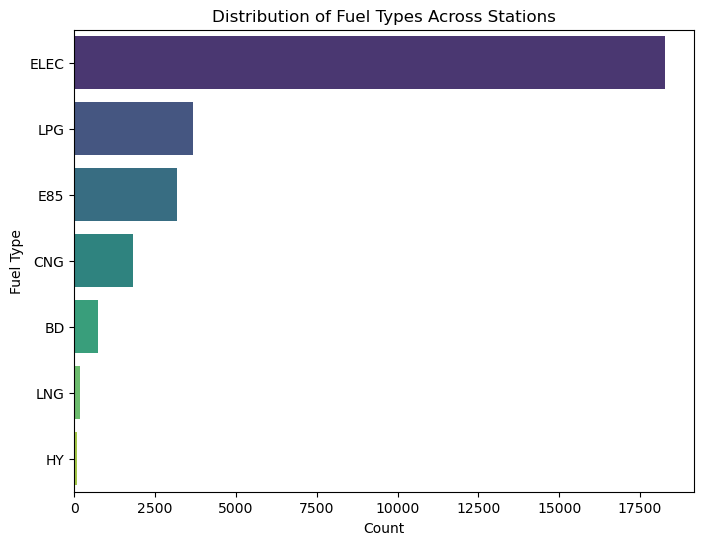

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(y="Fuel Type Code", data=df, order=df['Fuel Type Code'].value_counts().index, palette="viridis")
plt.title("Distribution of Fuel Types Across Stations")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.show()


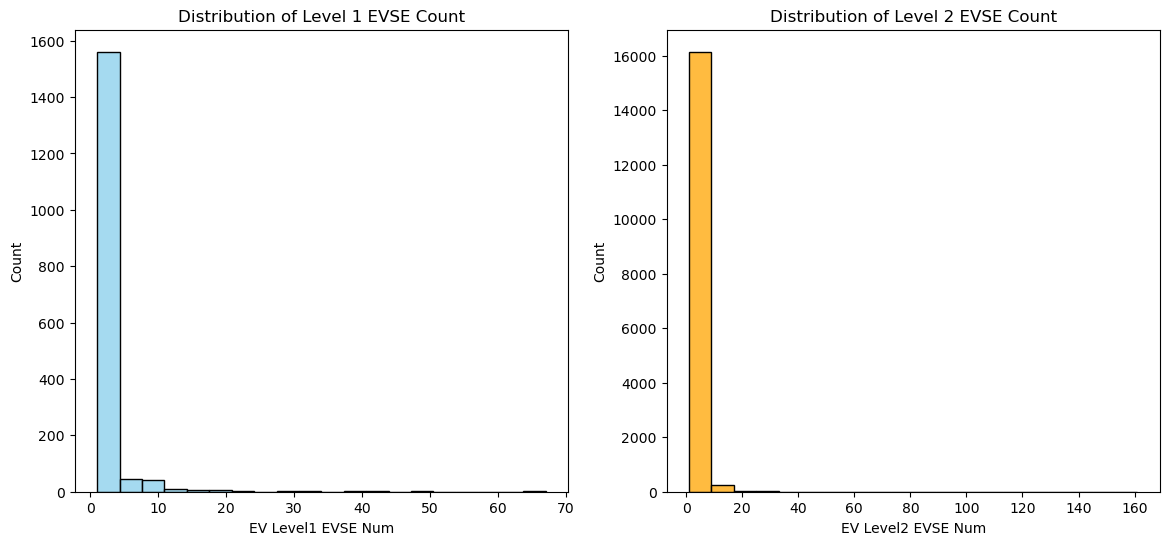

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.histplot(df['EV Level1 EVSE Num'].dropna(), bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Level 1 EVSE Count')

sns.histplot(df['EV Level2 EVSE Num'].dropna(), bins=20, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Level 2 EVSE Count')

plt.show()


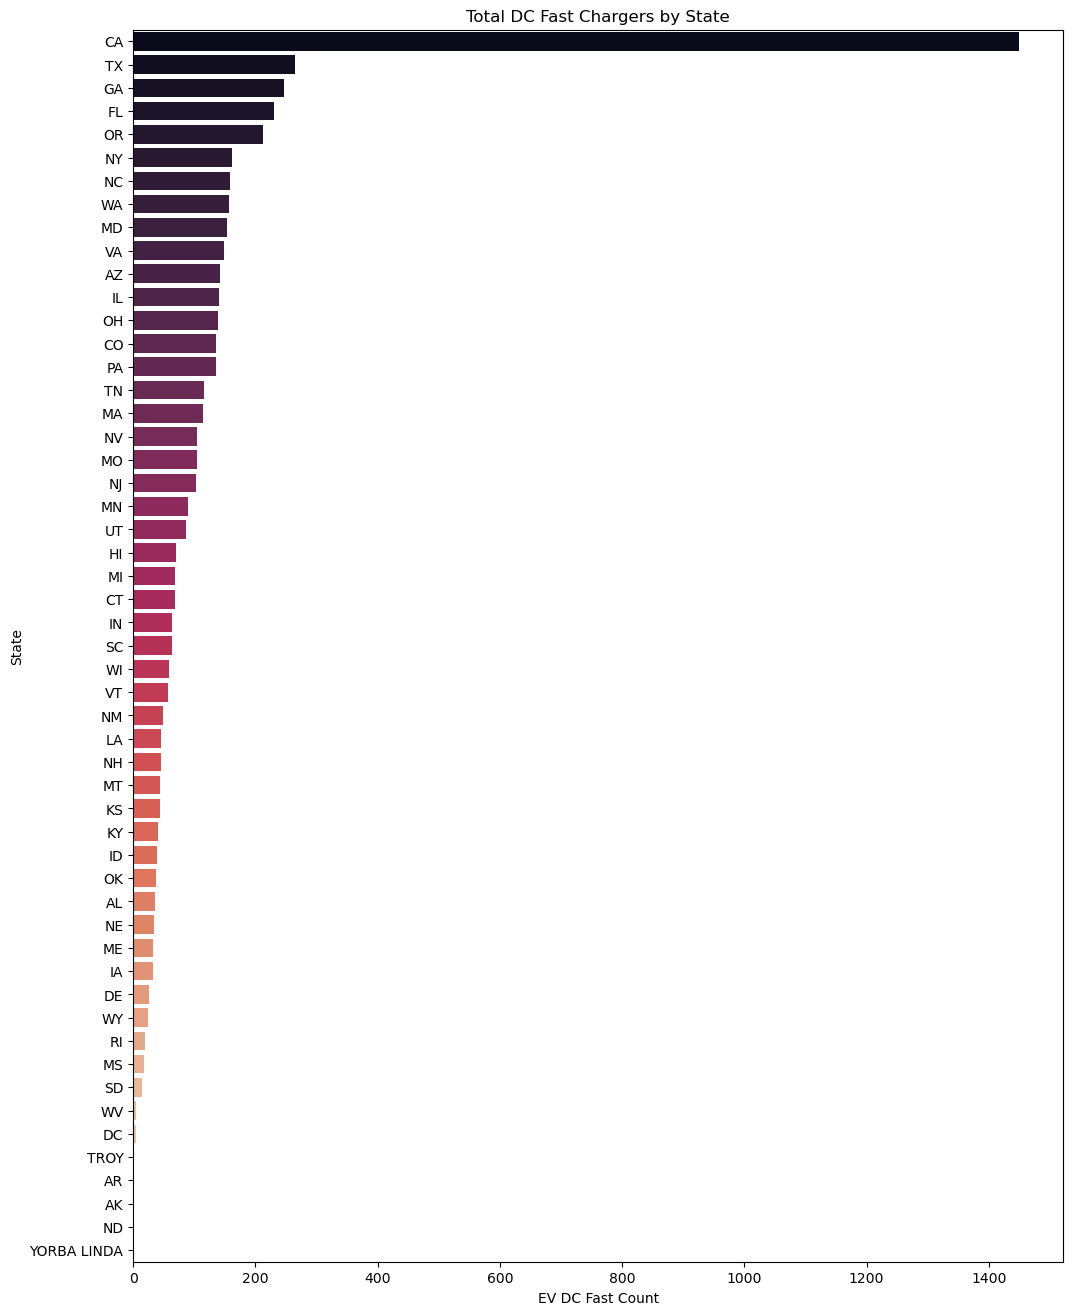

In [9]:
state_df = df.groupby("State")["EV DC Fast Count"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,16))
sns.barplot(x="EV DC Fast Count", y="State", data=state_df, palette="rocket")
plt.title("Total DC Fast Chargers by State")
plt.show()


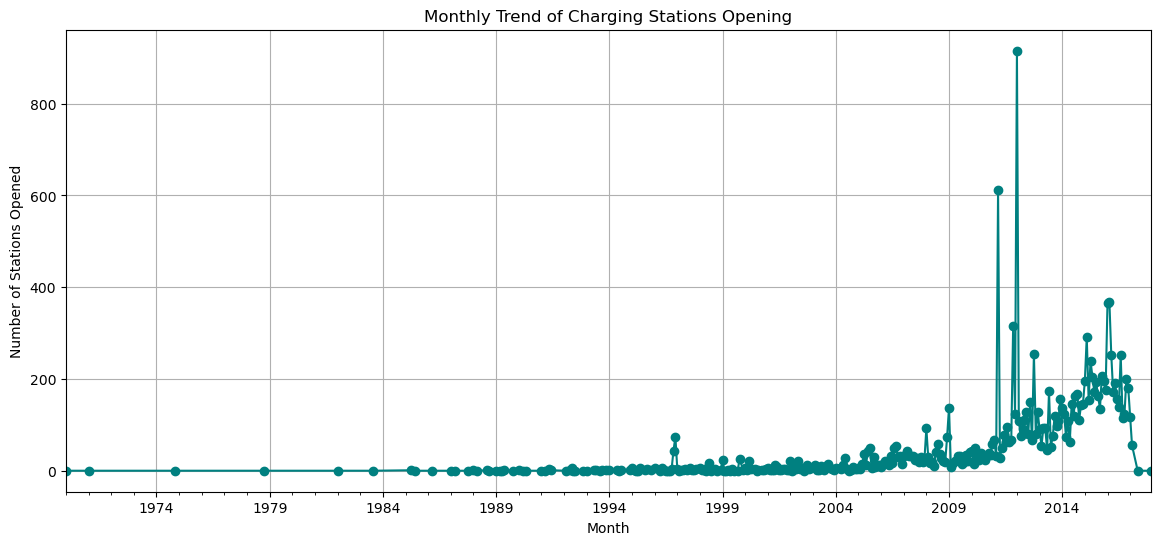

In [10]:
df["Open Date"] = pd.to_datetime(df["Open Date"], errors='coerce')

# Monthly trend of stations opening
monthly_trend = df["Open Date"].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(14,6))
monthly_trend.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Trend of Charging Stations Opening")
plt.xlabel("Month")
plt.ylabel("Number of Stations Opened")
plt.grid()
plt.show()


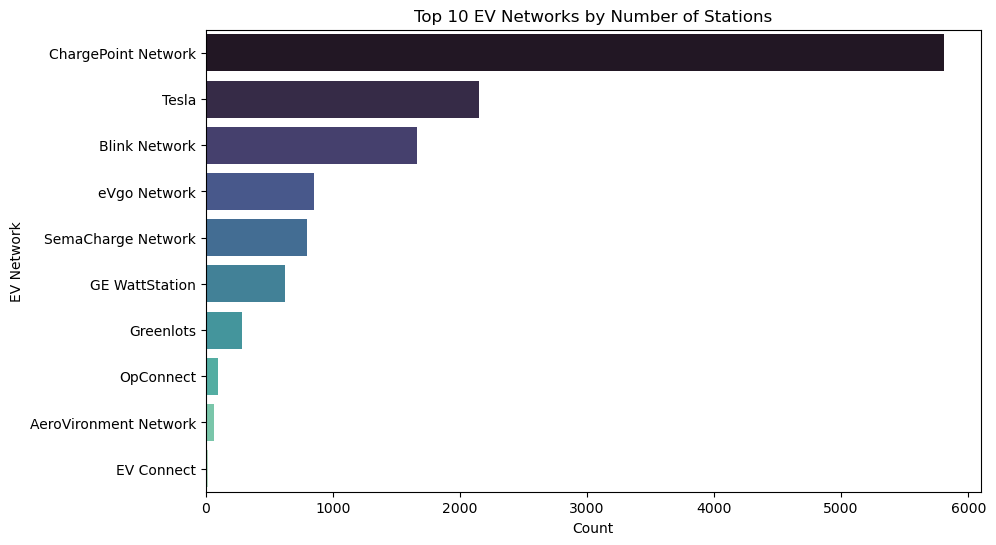

In [11]:
plt.figure(figsize=(10,6))
top_networks = df["EV Network"].value_counts().head(10)
sns.barplot(y=top_networks.index, x=top_networks.values, palette="mako")
plt.title("Top 10 EV Networks by Number of Stations")
plt.xlabel("Count")
plt.ylabel("EV Network")
plt.show()


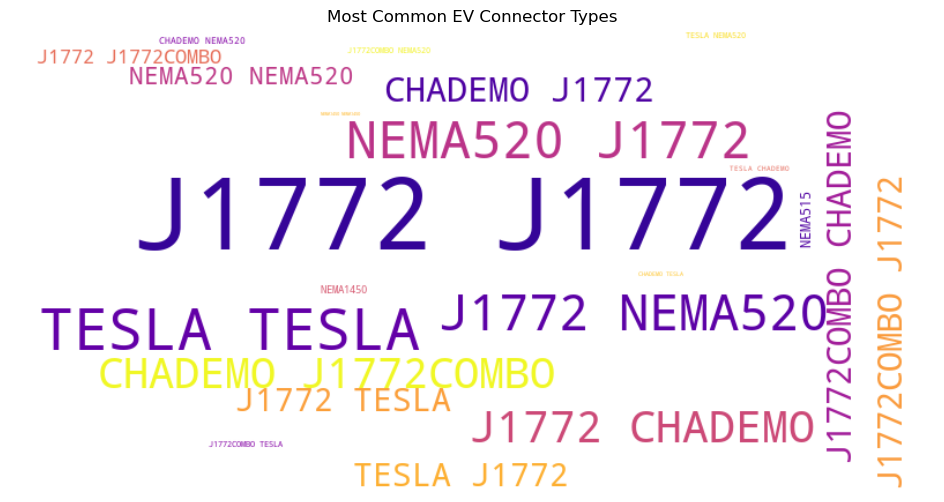

In [12]:
!pip install wordcloud
from wordcloud import WordCloud

connector_text = " ".join(df["EV Connector Types"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(connector_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common EV Connector Types")
plt.show()


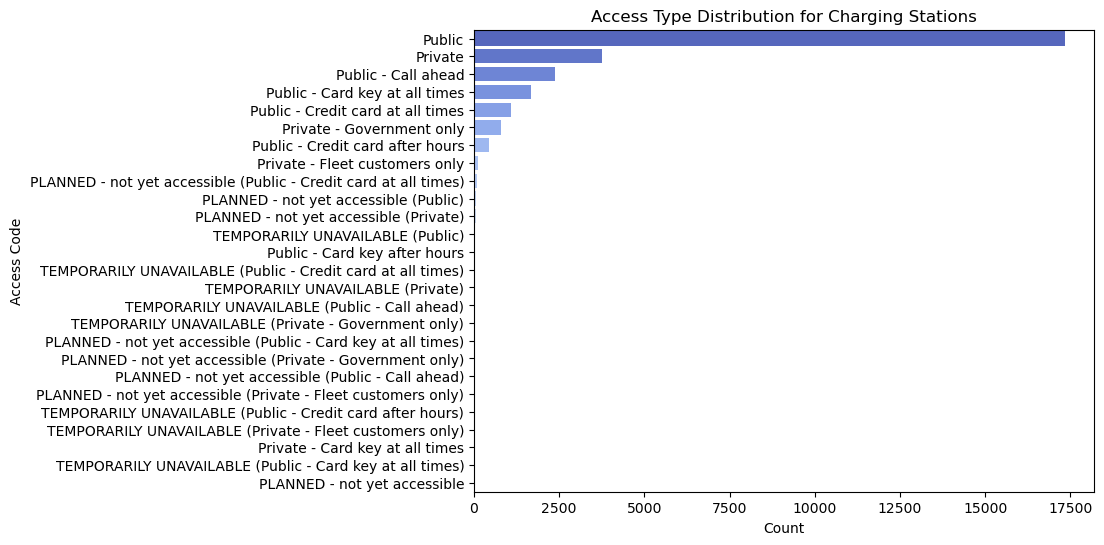

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(y="Groups With Access Code", data=df, order=df['Groups With Access Code'].value_counts().index, palette="coolwarm")
plt.title("Access Type Distribution for Charging Stations")
plt.xlabel("Count")
plt.ylabel("Access Code")
plt.show()


In [14]:
import plotly.express as px

# Group by location and network
bubble_df = df.dropna(subset=["Latitude", "Longitude", "EV Network"])
bubble_df = bubble_df.groupby(["Latitude", "Longitude", "EV Network"]).size().reset_index(name='Station Count')

fig = px.scatter_mapbox(
    bubble_df, 
    lat="Latitude", 
    lon="Longitude", 
    size="Station Count", 
    color="EV Network",
    hover_name="EV Network",
    size_max=20,
    zoom=3,
    mapbox_style="carto-positron",
    title="Bubble Map: Station Concentration & Network Distribution"
)
fig.show()


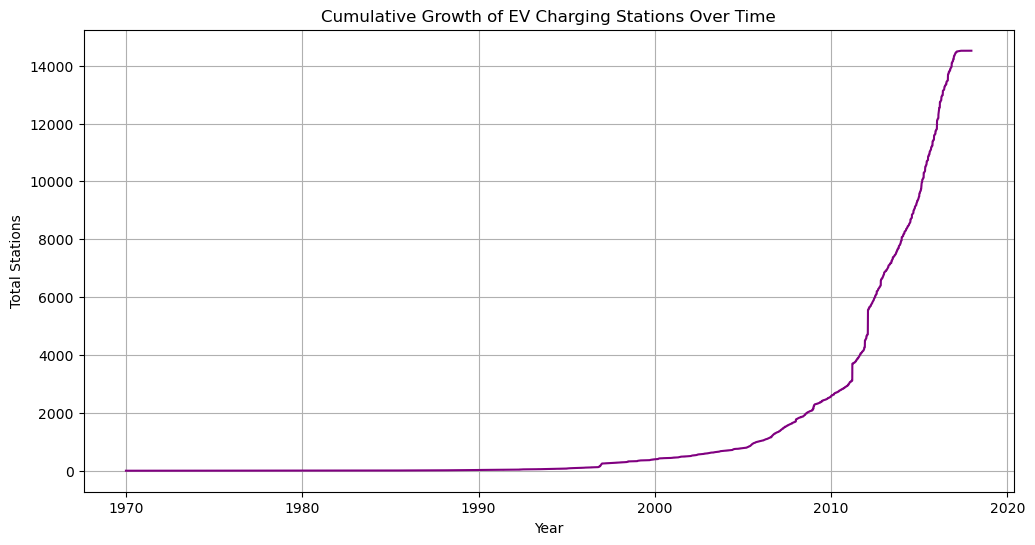

In [15]:
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')

# Cumulative count
time_df = df.dropna(subset=['Open Date']).sort_values('Open Date')
time_df['Cumulative Count'] = range(1, len(time_df) + 1)

plt.figure(figsize=(12,6))
sns.lineplot(data=time_df, x='Open Date', y='Cumulative Count', color='purple')
plt.title('Cumulative Growth of EV Charging Stations Over Time')
plt.xlabel('Year')
plt.ylabel('Total Stations')
plt.grid()
plt.show()


In [16]:
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

fig = px.choropleth(
    state_counts,
    locations='State',
    locationmode='USA-states',
    color='Count',
    color_continuous_scale="Viridis",
    scope="usa",
    title="EV Charging Station Density by State"
)
fig.show()


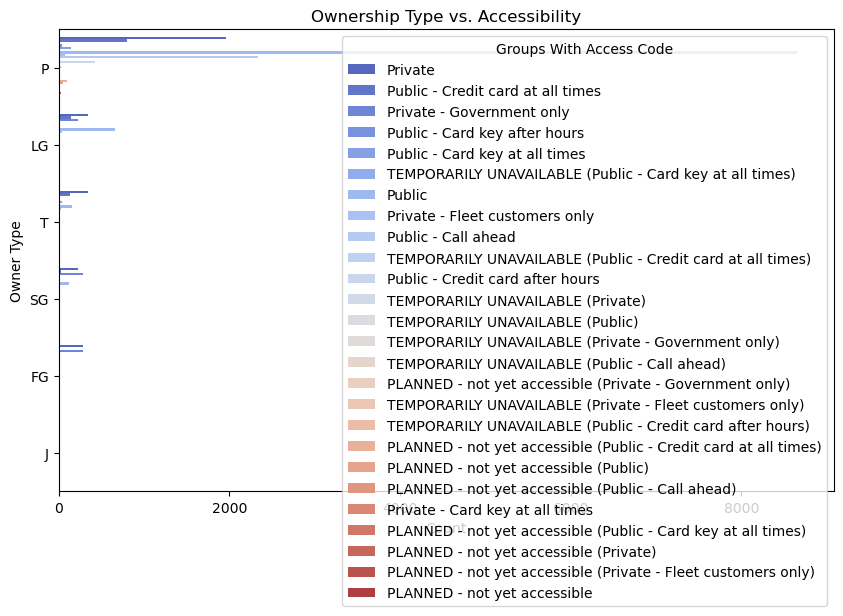

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Owner Type Code', hue='Groups With Access Code', palette='coolwarm', order=df['Owner Type Code'].value_counts().index)
plt.title('Ownership Type vs. Accessibility')
plt.xlabel('Count')
plt.ylabel('Owner Type')
plt.show()


#### <i> Data Preprocessing </i>

In [18]:
df['Public Access'] = df['Groups With Access Code'].apply(lambda x: 1 if str(x).strip().lower() == 'public' else 0)
df['Public Access'].value_counts()


Public Access
1    17328
0    10594
Name: count, dtype: int64

In [19]:
drop_cols = [
    'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4', 'Station Phone',
    'Expected Date', 'Access Days Time', 'Cards Accepted', 'EV Other Info', 'EV Network Web', 'Date Last Confirmed',
    'ID', 'Updated At', 'Open Date', 'Hydrogen Status Link'
]

df.drop(columns=drop_cols, inplace=True)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify remaining categorical columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['Groups With Access Code']]

# Fill missing categorical values with "Unknown"
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Convert to string to avoid LabelEncoder error
df[cat_cols] = df[cat_cols].astype(str)

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [21]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Public Access']]

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])


In [22]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [23]:
X = df.drop(columns=['Groups With Access Code', 'Public Access'])
y = df['Public Access']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (22337, 19)
Test set shape: (5585, 19)


#### <i> Modeling </i>
#### <i> Random Forest Classifier </i>

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("=== Random Forest Classifier Evaluation ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


=== Random Forest Classifier Evaluation ===
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2119
           1       0.88      0.90      0.89      3466

    accuracy                           0.86      5585
   macro avg       0.85      0.85      0.85      5585
weighted avg       0.86      0.86      0.86      5585

Confusion Matrix:
 [[1695  424]
 [ 353 3113]]
Accuracy: 0.8609


#### <i> XGBoost </i>

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("=== XGBoost Classifier Evaluation ===")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


=== XGBoost Classifier Evaluation ===
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2119
           1       0.87      0.92      0.89      3466

    accuracy                           0.86      5585
   macro avg       0.86      0.85      0.85      5585
weighted avg       0.86      0.86      0.86      5585

Confusion Matrix:
 [[1644  475]
 [ 289 3177]]
Accuracy: 0.8632


#### <i> Logistic Regression </i>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
print("=== Logistic Regression Evaluation ===")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")


=== Logistic Regression Evaluation ===
              precision    recall  f1-score   support

           0       0.79      0.71      0.74      2119
           1       0.83      0.88      0.86      3466

    accuracy                           0.82      5585
   macro avg       0.81      0.79      0.80      5585
weighted avg       0.81      0.82      0.81      5585

Confusion Matrix:
 [[1494  625]
 [ 401 3065]]
Accuracy: 0.8163


#### <i> Comparision Of All Models </i>

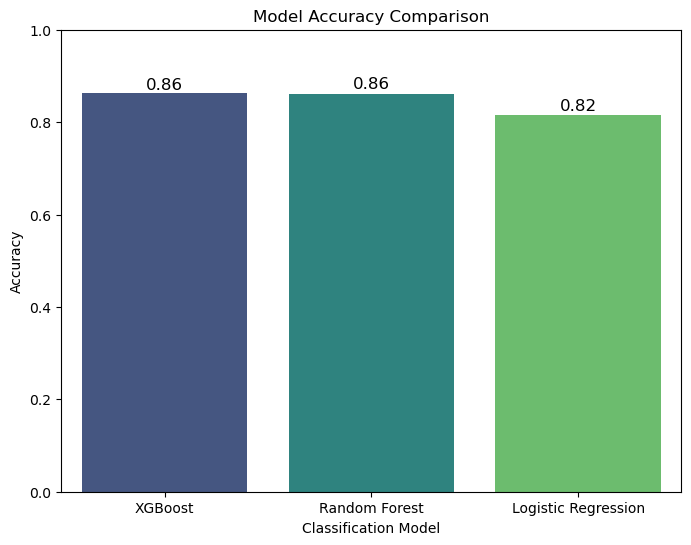

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Store accuracy of all models
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_log)
]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Sort for better visualization
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=comparison_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Classification Model')

# Show actual accuracy on top of bars
for index, row in comparison_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center', fontsize=12)

plt.show()
